In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('rock_density_xray.csv')

In [51]:
df.columns = ['Signal','Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

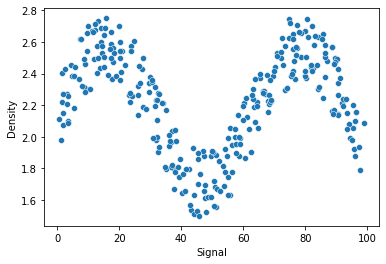

In [52]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [53]:
X= df['Signal'].values.reshape(-1,1)
y= df['Density']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr_model = LinearRegression()

In [58]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [59]:
lr_preds = lr_model.predict(X_test)

In [60]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [63]:
signal_range = np.arange(0,100)

signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [64]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [65]:
signal_preds=lr_model.predict(signal_range.reshape(-1,1))

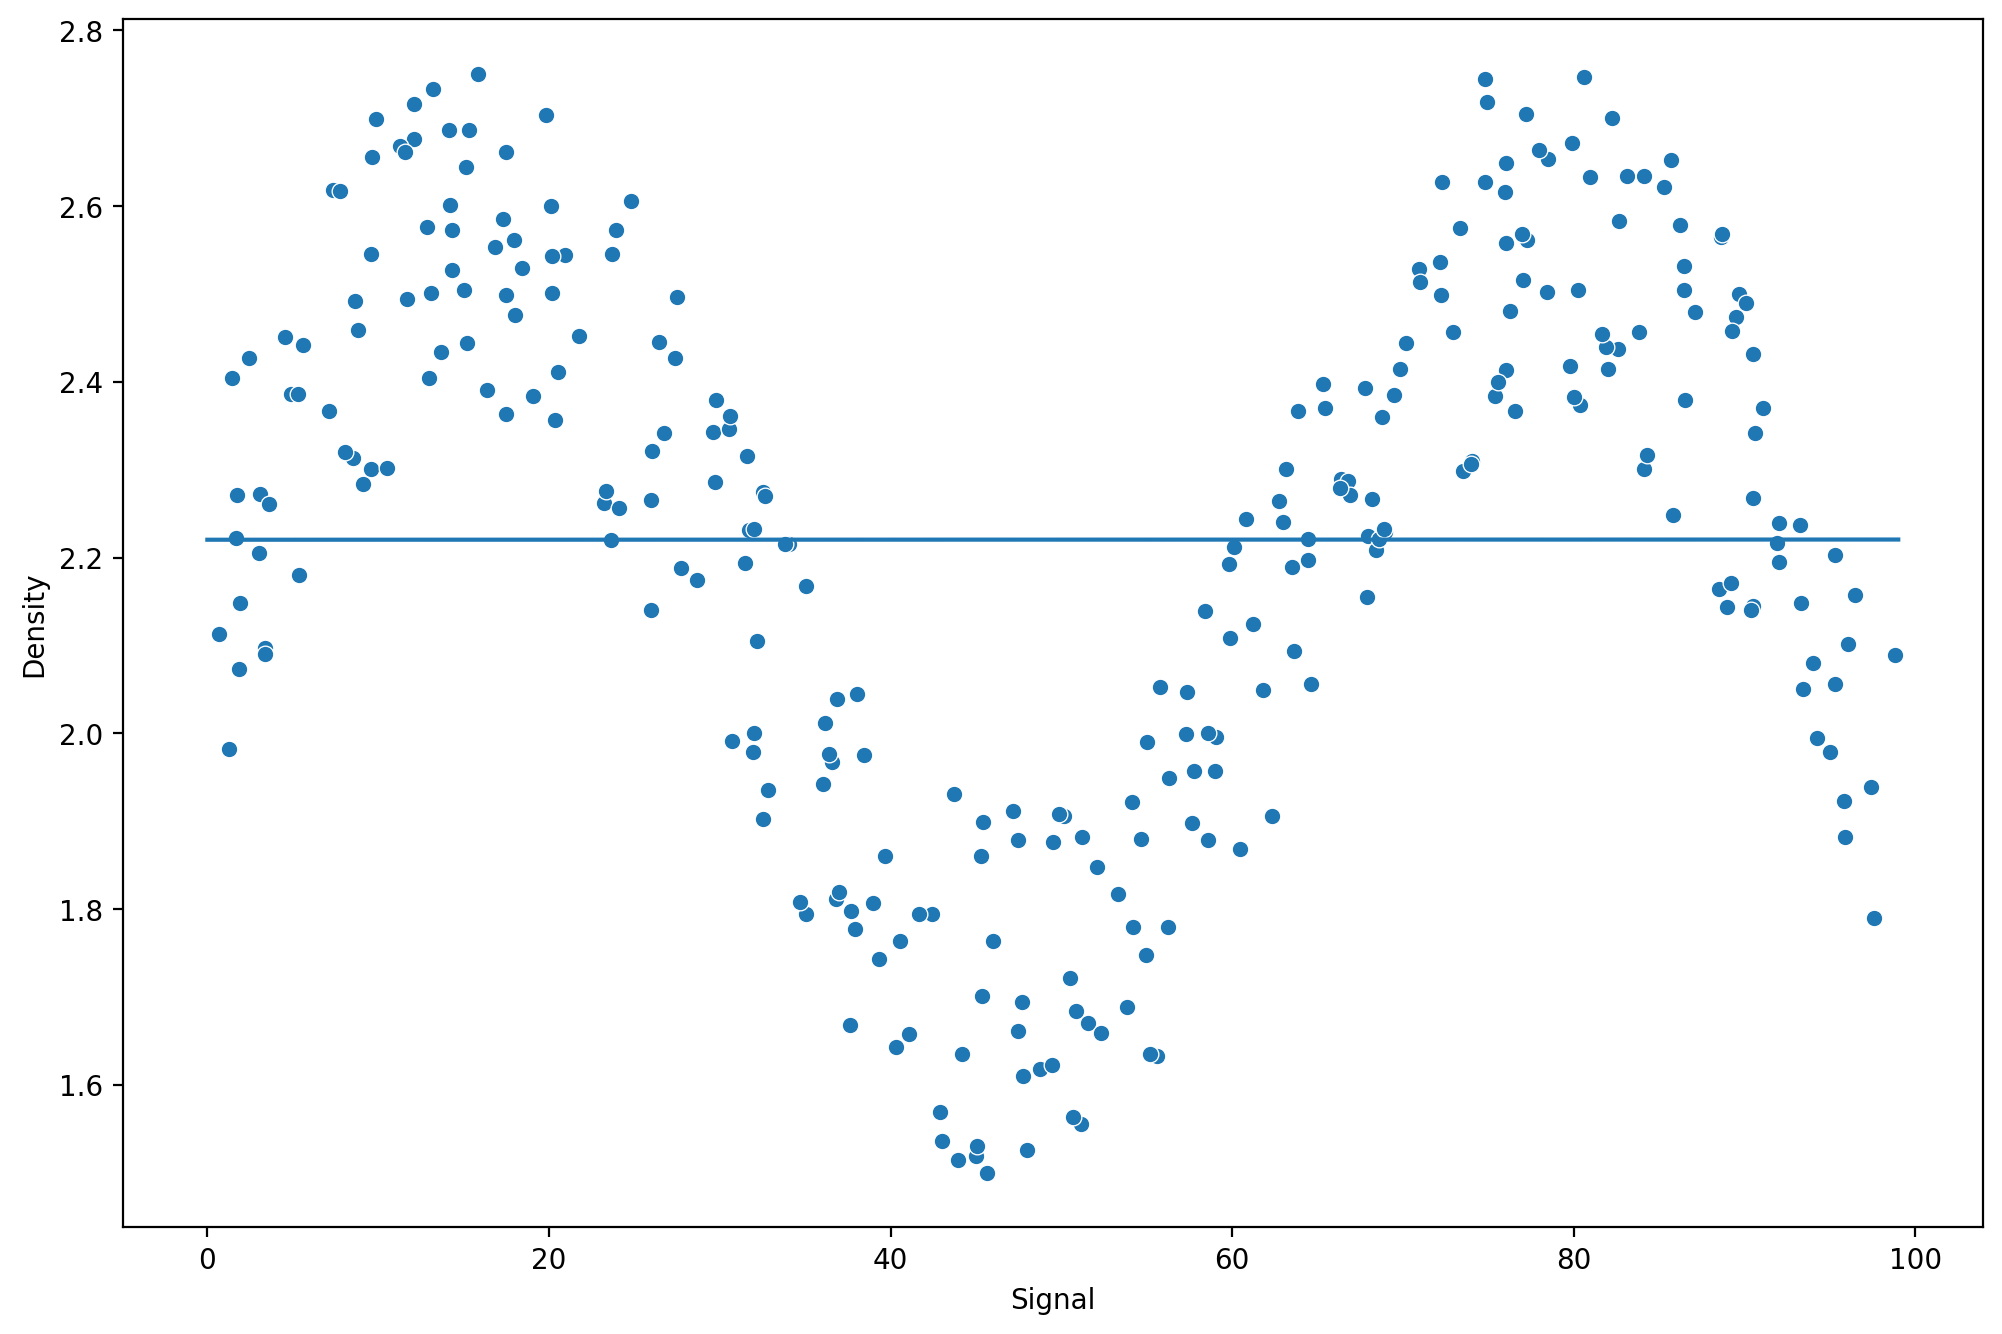

In [66]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

plt.plot(signal_range,signal_preds)

In [111]:
def run_model(model,X_train,y_train,X_test,y_test):

    # FIT MODEL TRAINING
    model.fit(X_train,y_train)

    # GET METRICS
    preds=model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'MAE:{mae}')
    print(f'RMSE:{rmse}')
    #PLOT RESULTS MODEL SIGNAL RANGE
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='Signal',y='Density',data=df, color='black')

    plt.plot(signal_range,signal_preds) 


MAE:0.211198973318633
RMSE:0.2570051996584629


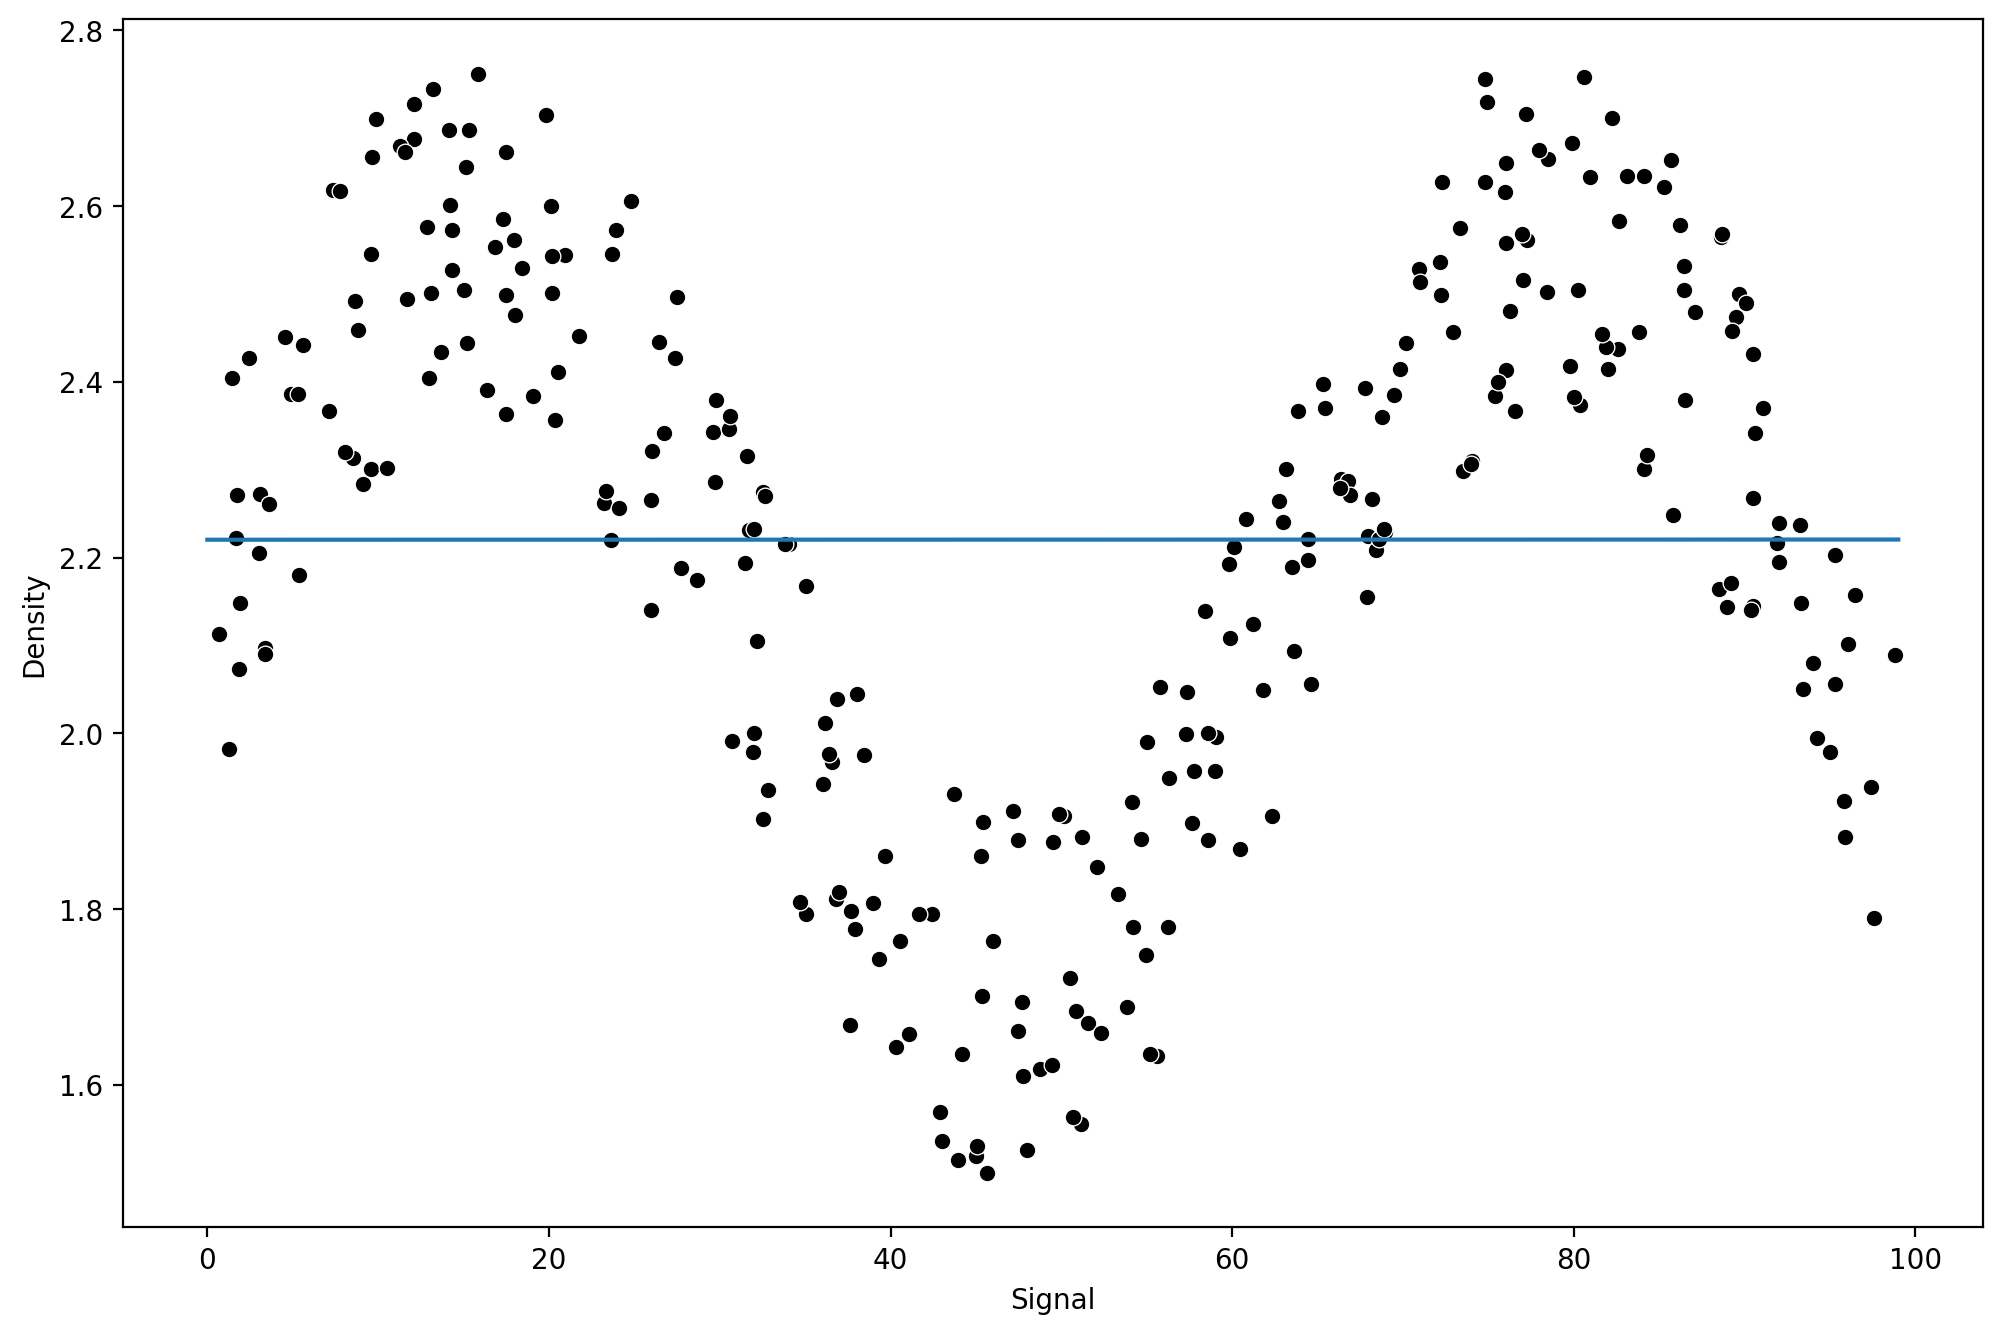

In [71]:
model = LinearRegression()
run_model(model,X_train, X_test,y_test)

In [80]:
from sklearn.pipeline import make_pipeline

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

MAE:0.11969137702563783
RMSE:0.13807463509811987


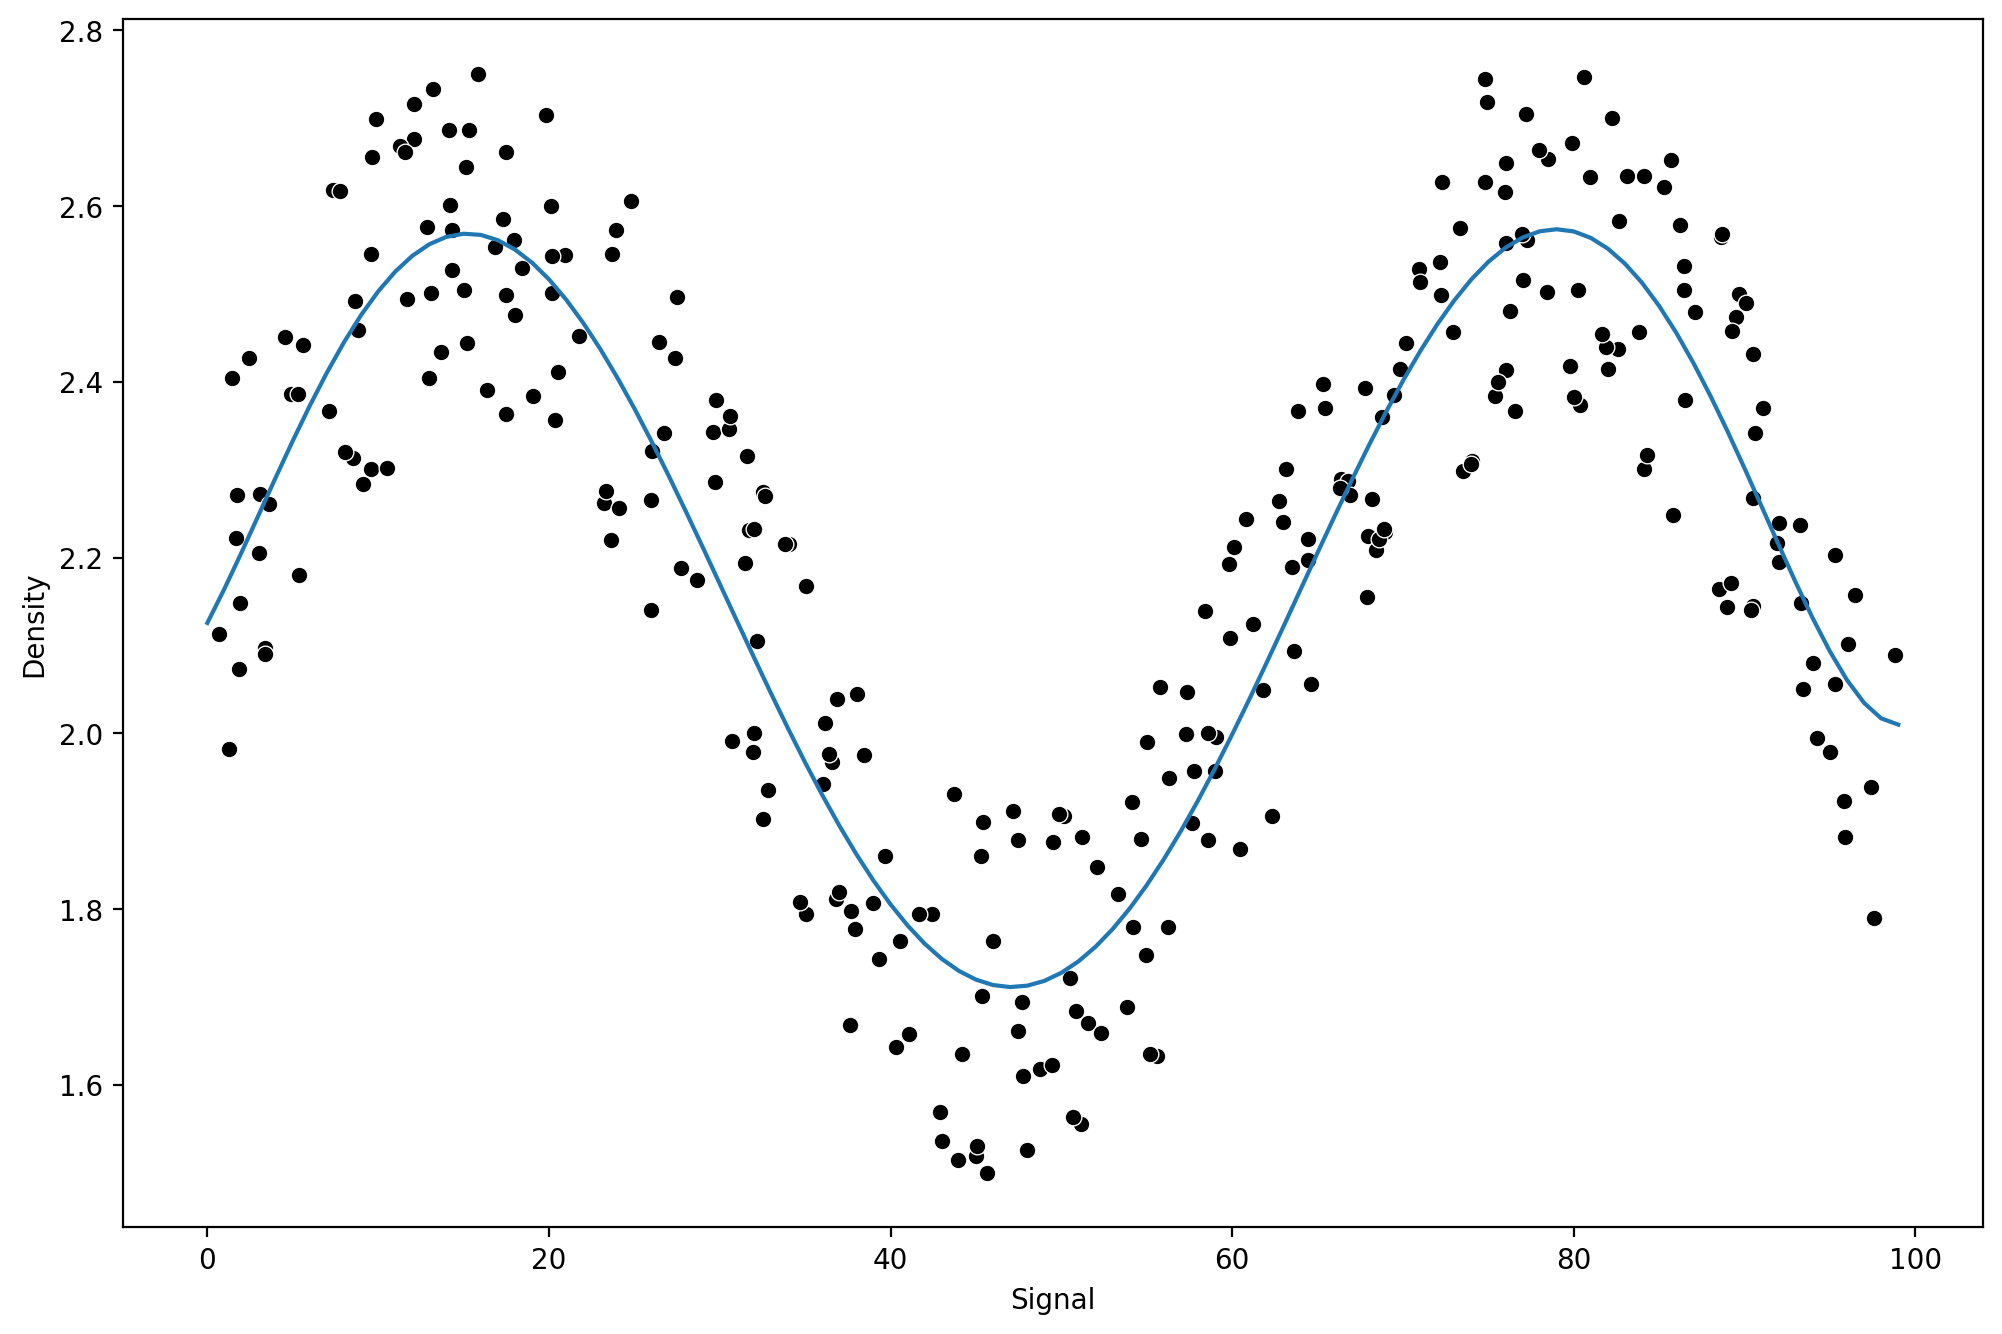

In [87]:
run_model(pipe,X_train, X_test,y_test)

In [88]:
from sklearn.neighbors import KNeighborsRegressor

In [91]:
from sklearn.tree import DecisionTreeRegressor

MAE:0.11877297474442378
RMSE:0.1523487028635337


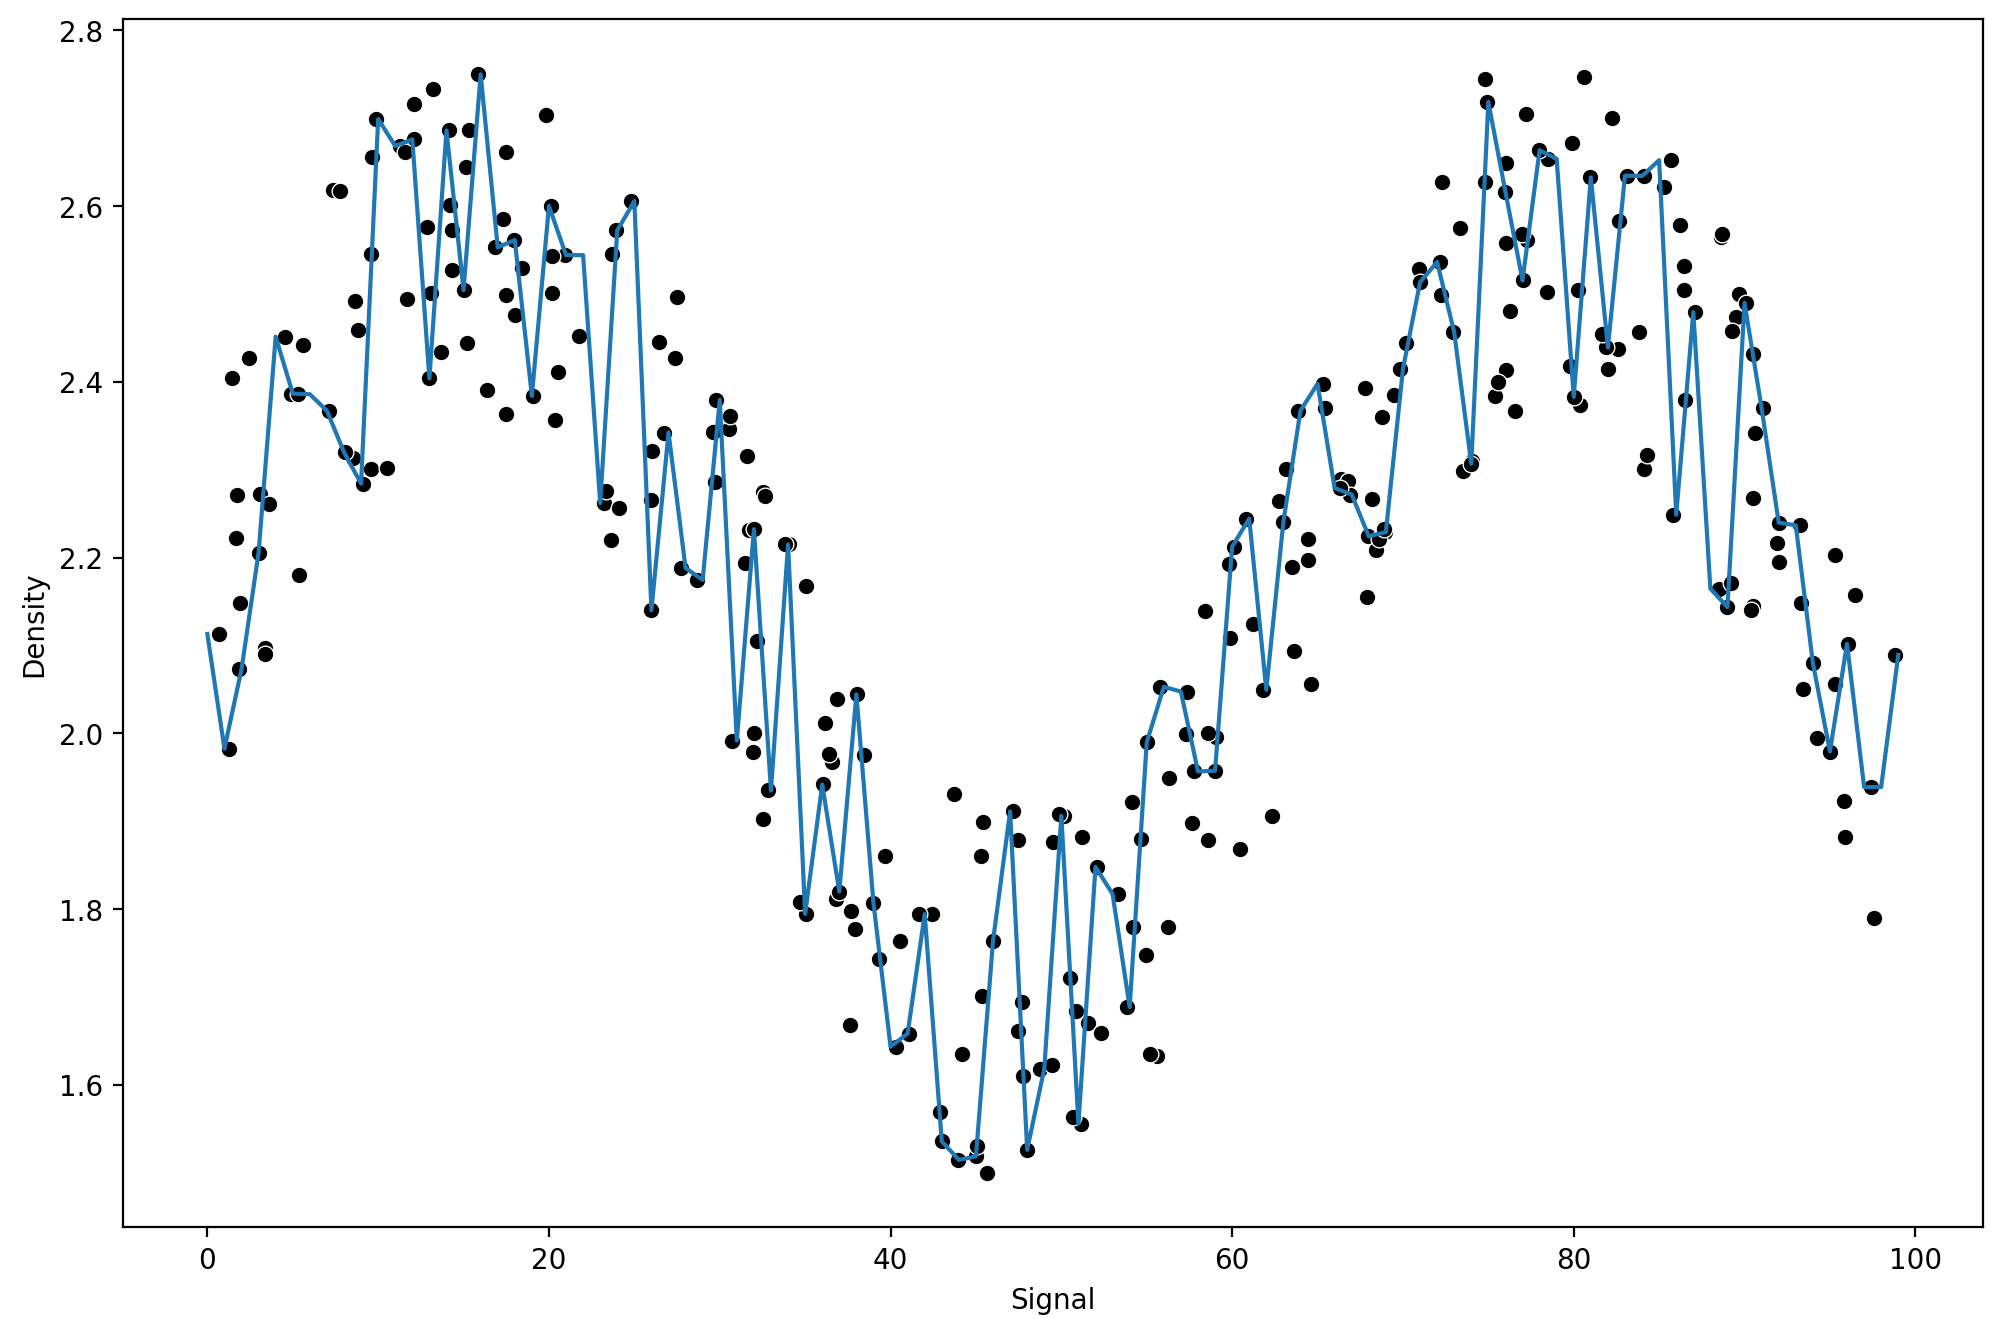

In [92]:
model = DecisionTreeRegressor()
run_model(model,X_train, X_test,y_test)

MAE:0.11877297474442378
RMSE:0.1523487028635337
MAE:0.12198383614100558
RMSE:0.13730685016923647
MAE:0.11635971693292672
RMSE:0.13277855732740926


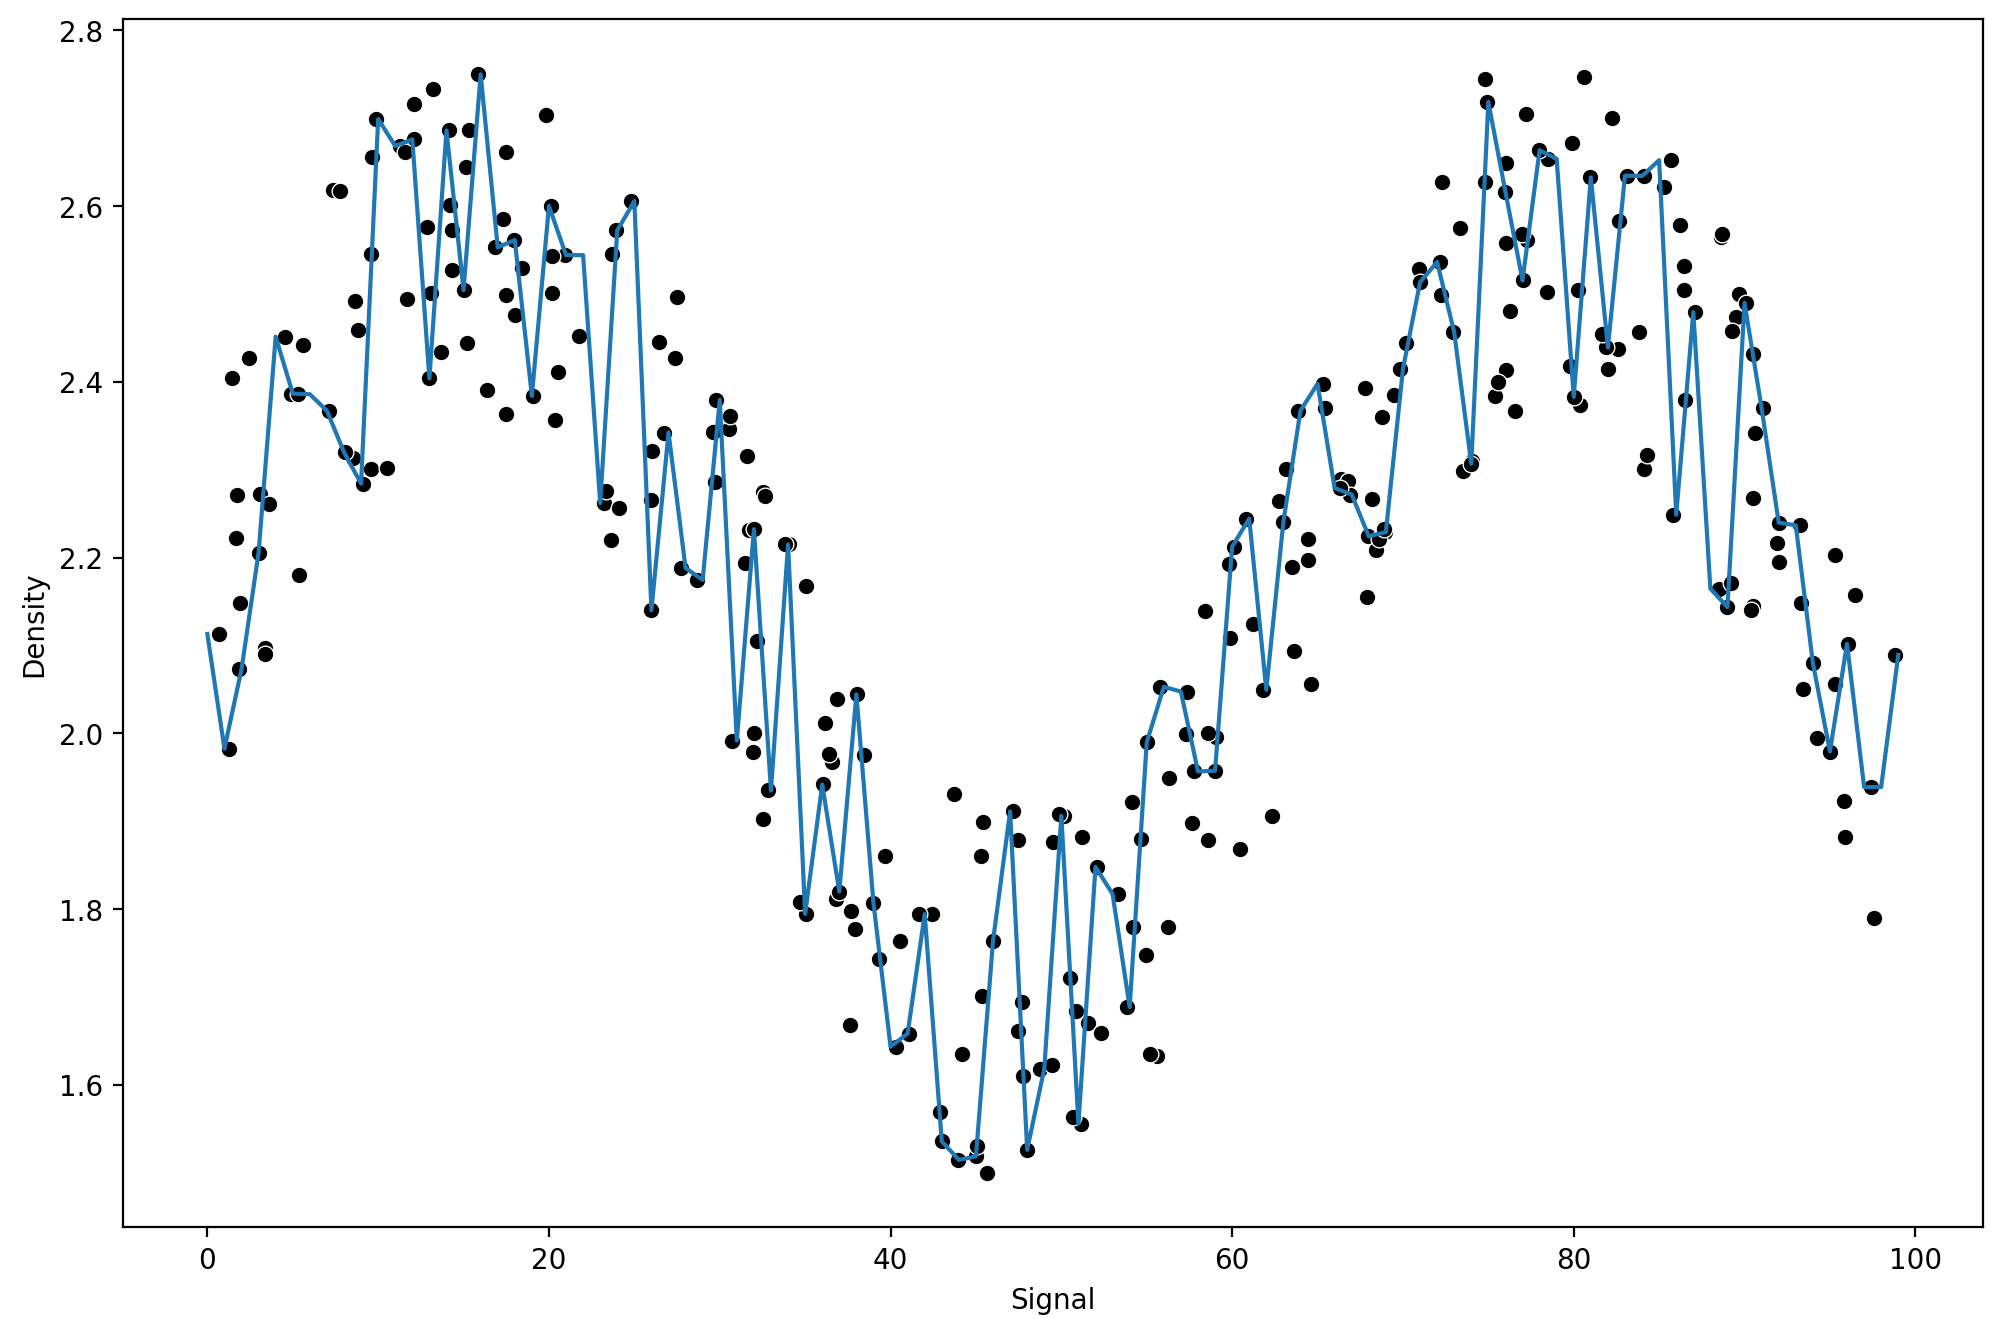

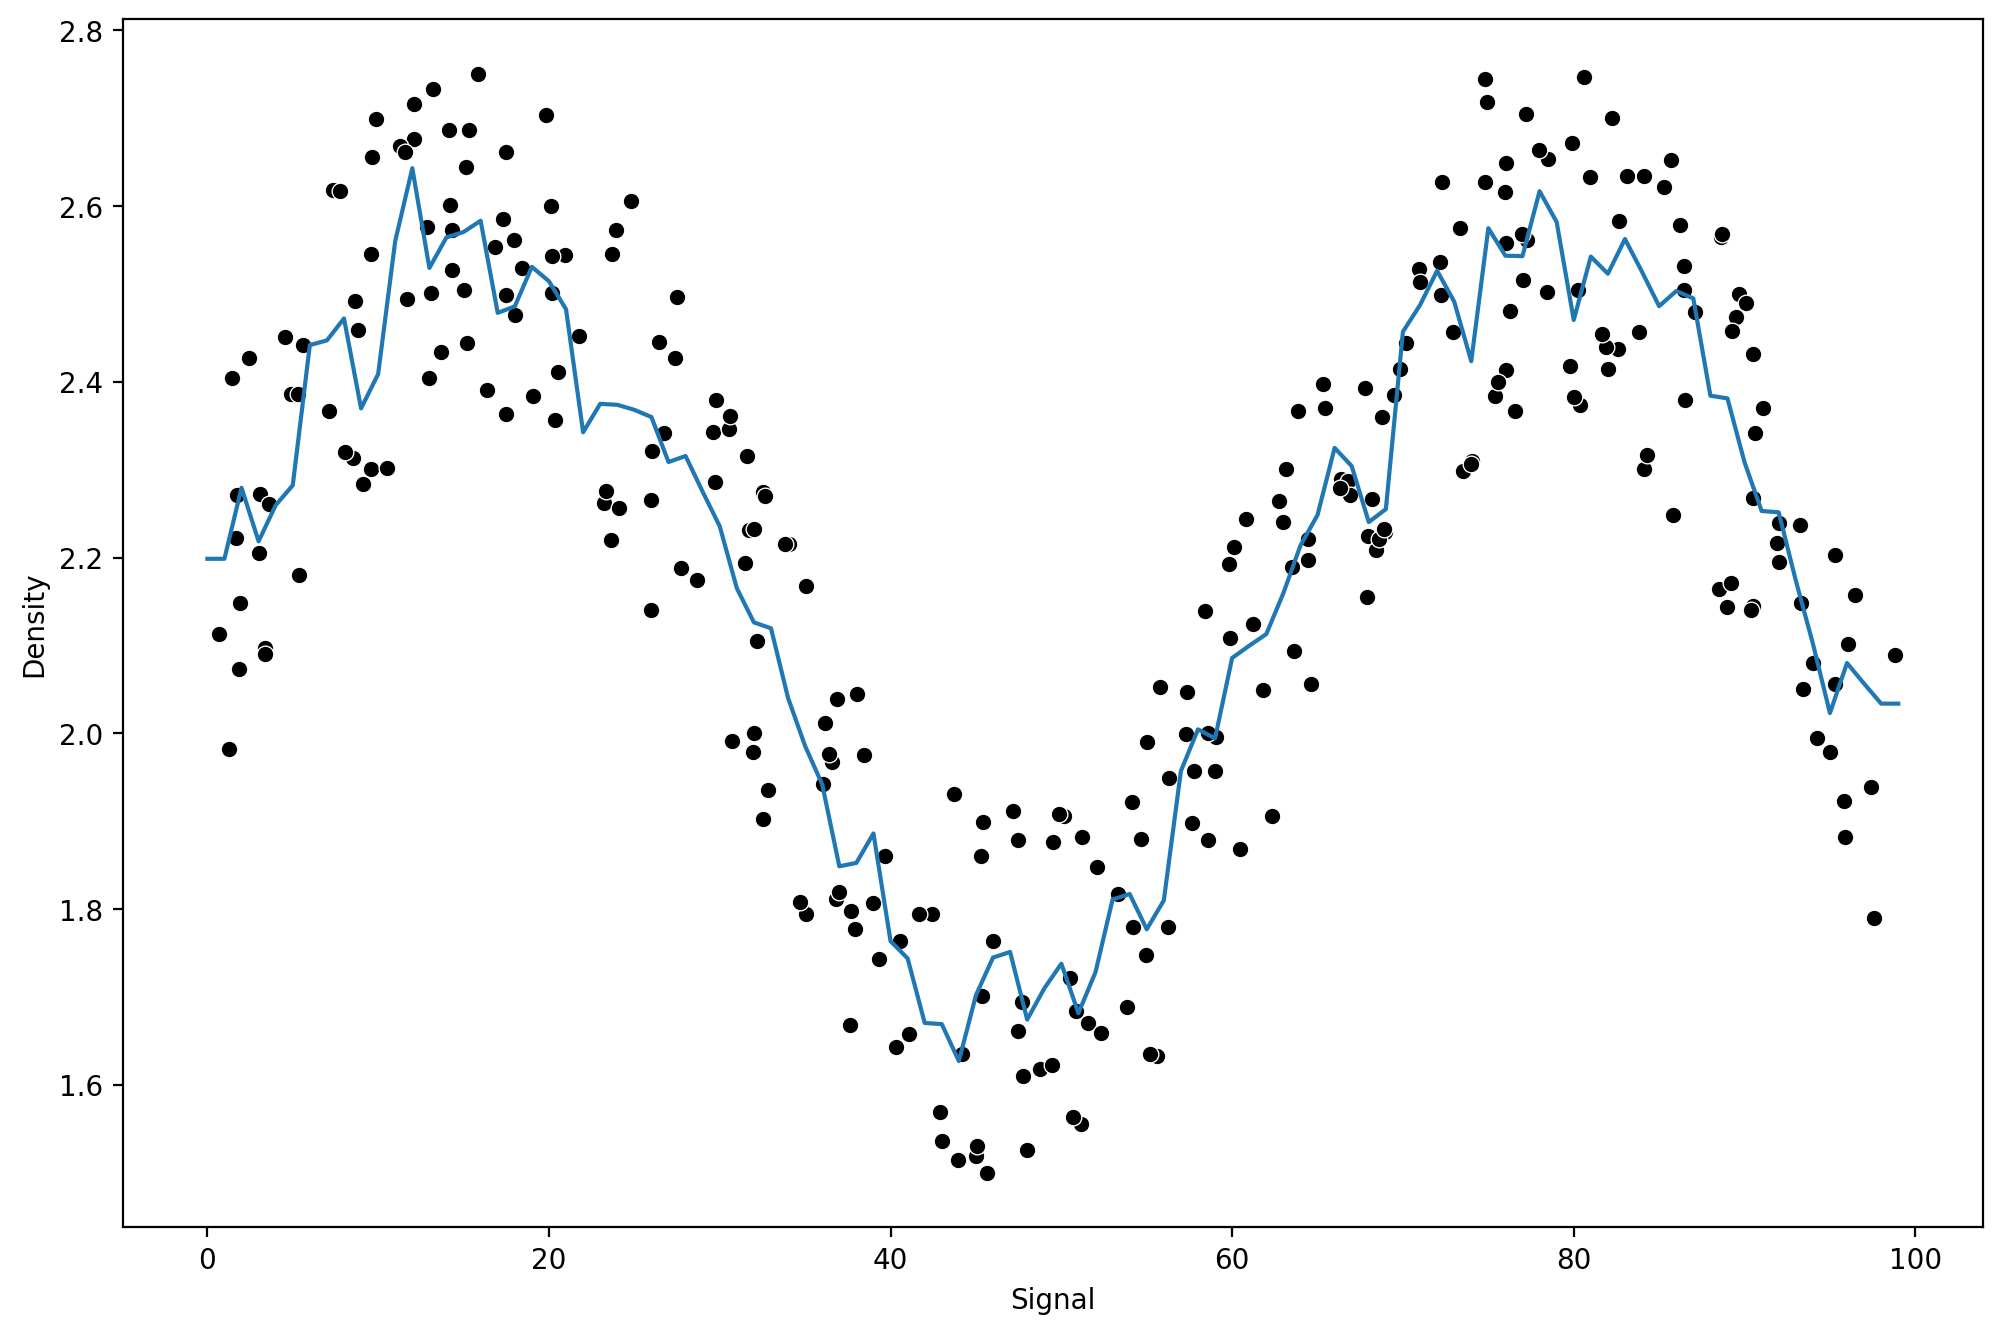

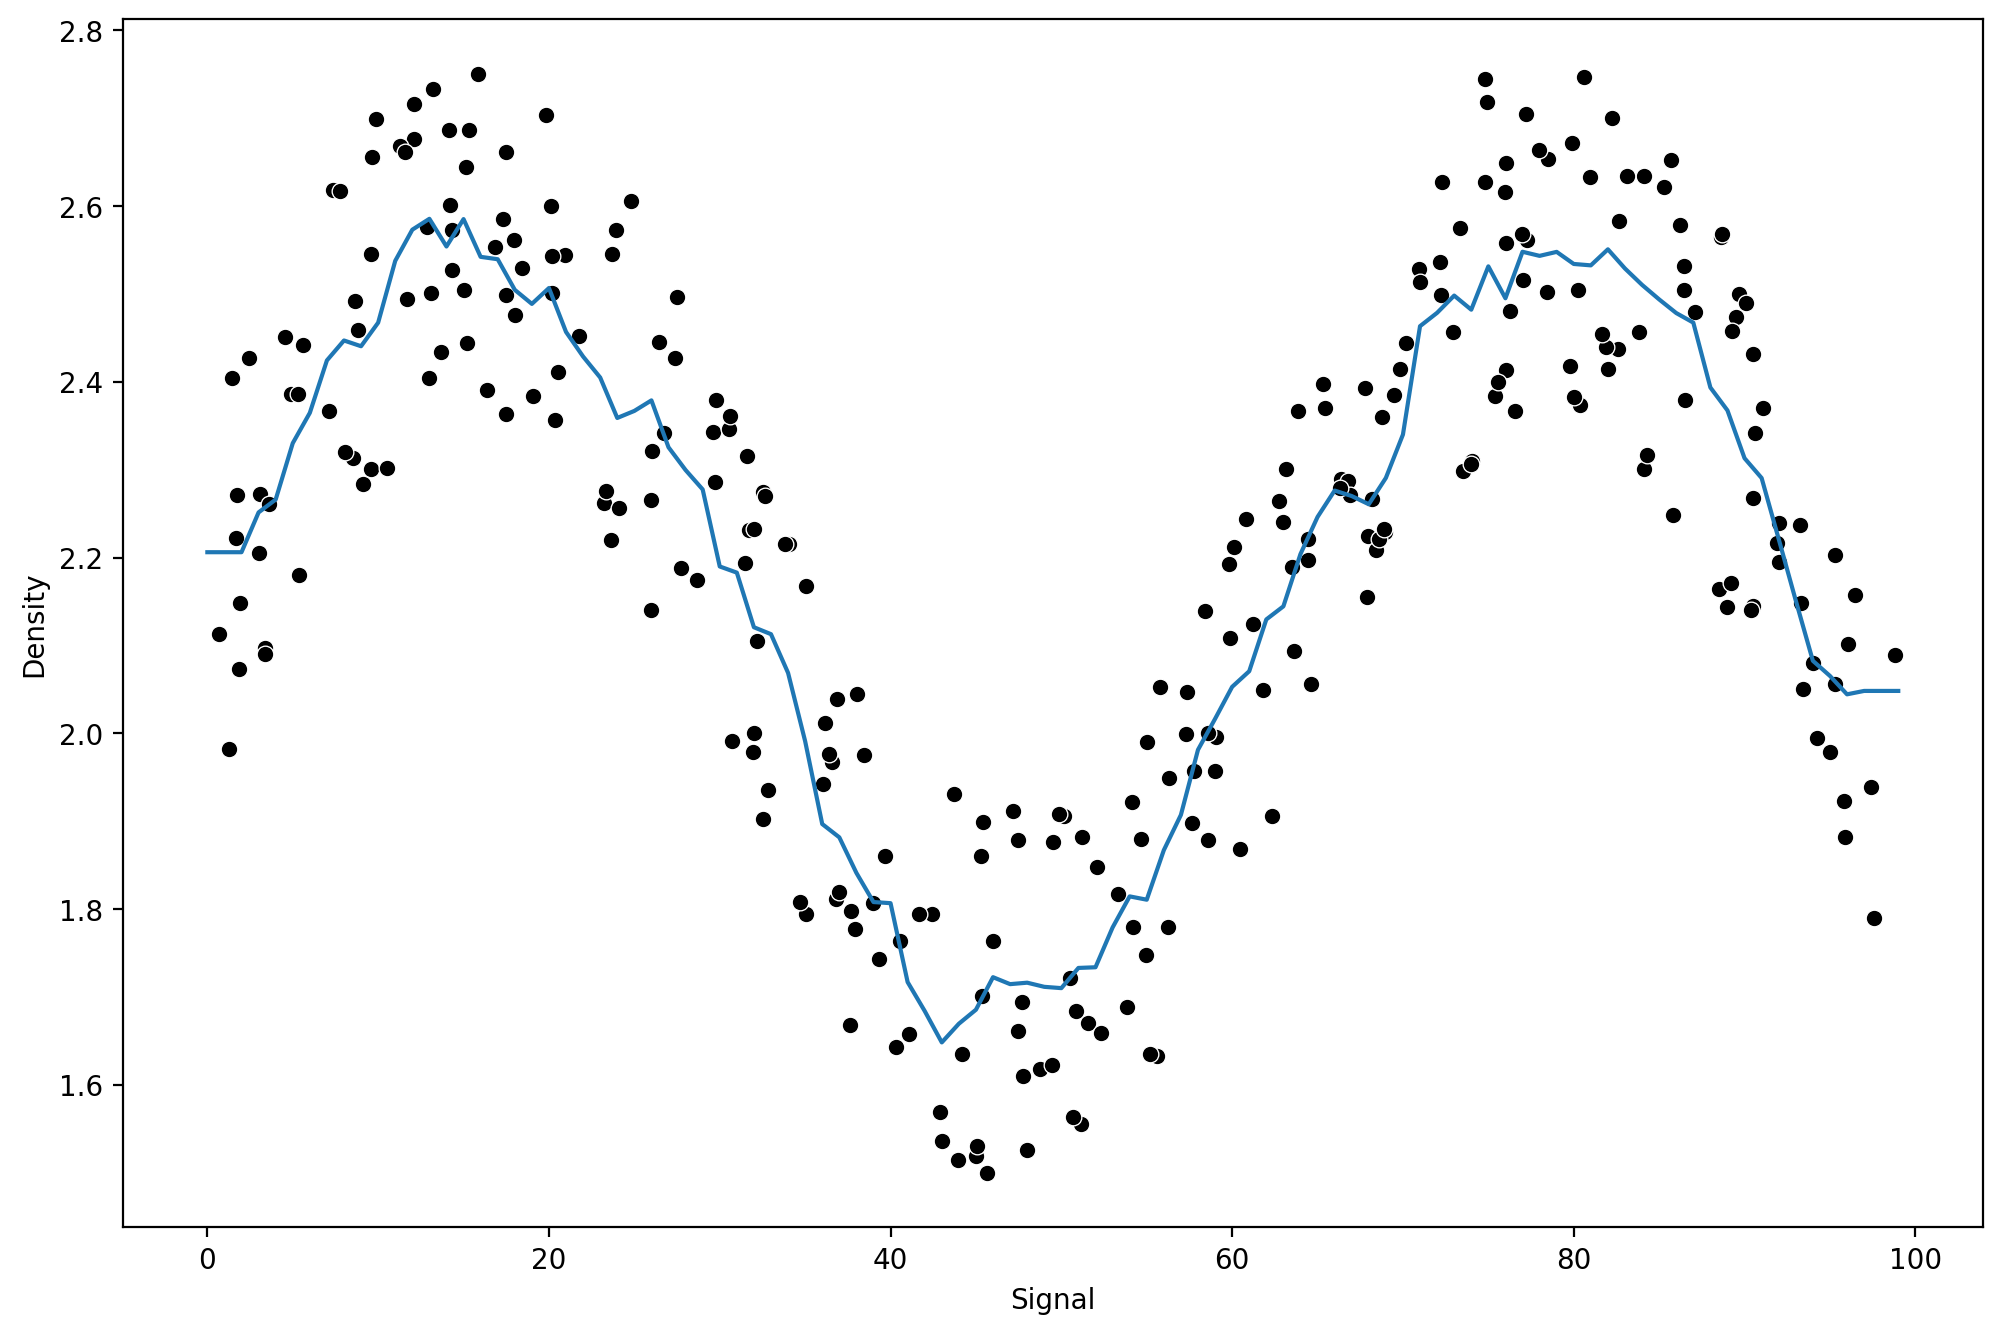

In [89]:
k_values = [1,5,10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train, X_test,y_test)

    

In [93]:
from sklearn.svm import SVR 

In [95]:
from sklearn.model_selection import GridSearchCV    

In [100]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [101]:
grid = GridSearchCV(svr,param_grid)

MAE:0.10854210121342305
RMSE:0.12646999302043452


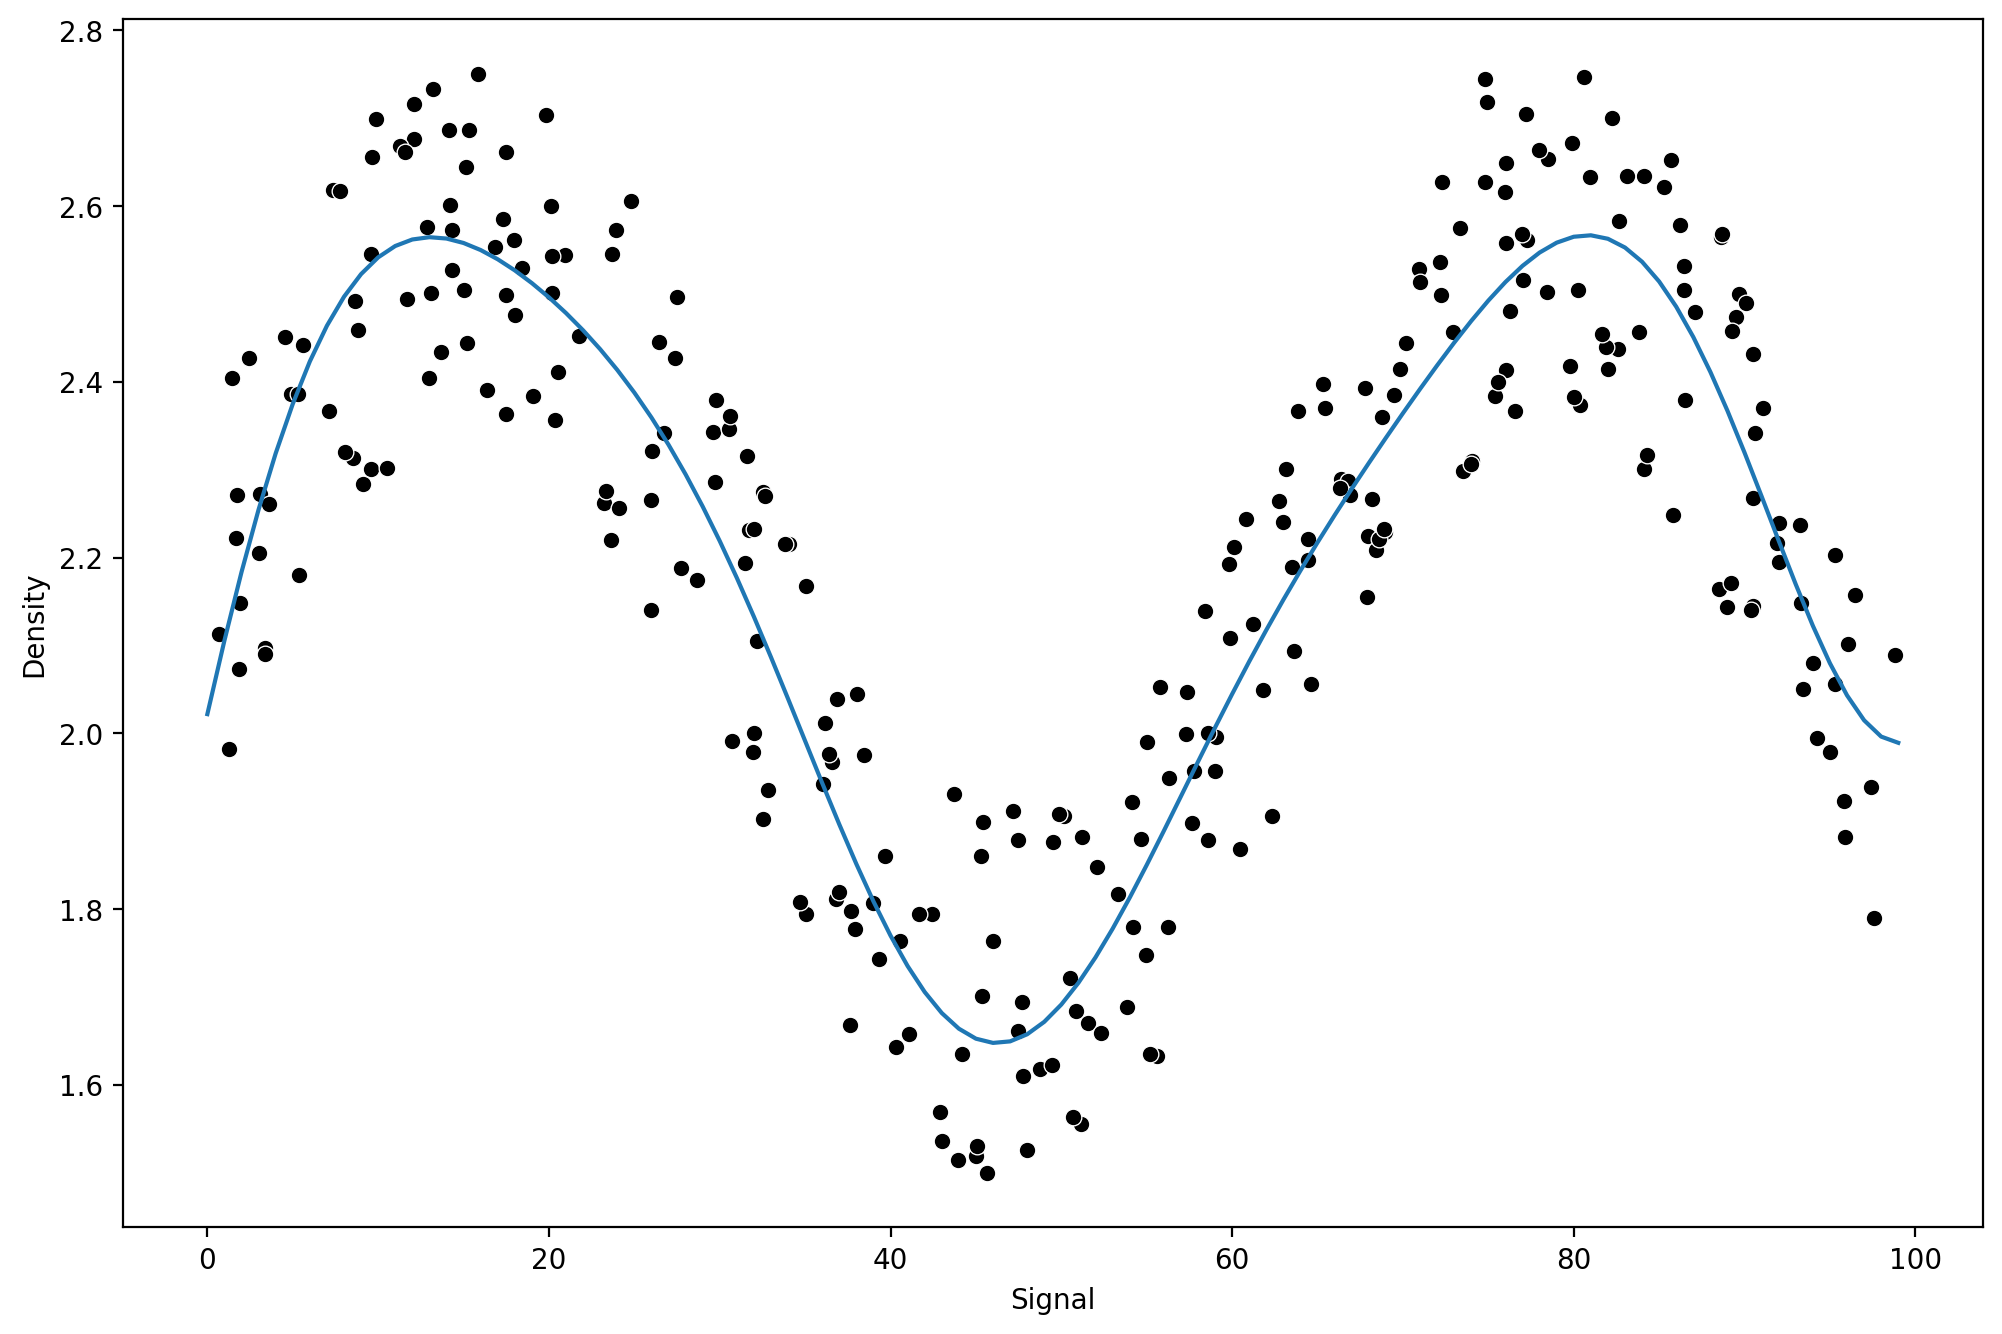

In [106]:
run_model(grid,X_train, X_test,y_test,y_train)


In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
rfr = RandomForestRegressor(n_estimators=10)

MAE:0.10925101285340587
RMSE:0.1308776770788015
MAE:0.10842570237227381
RMSE:0.13132911340373876
MAE:0.11271993547482459
RMSE:0.1343353102241363


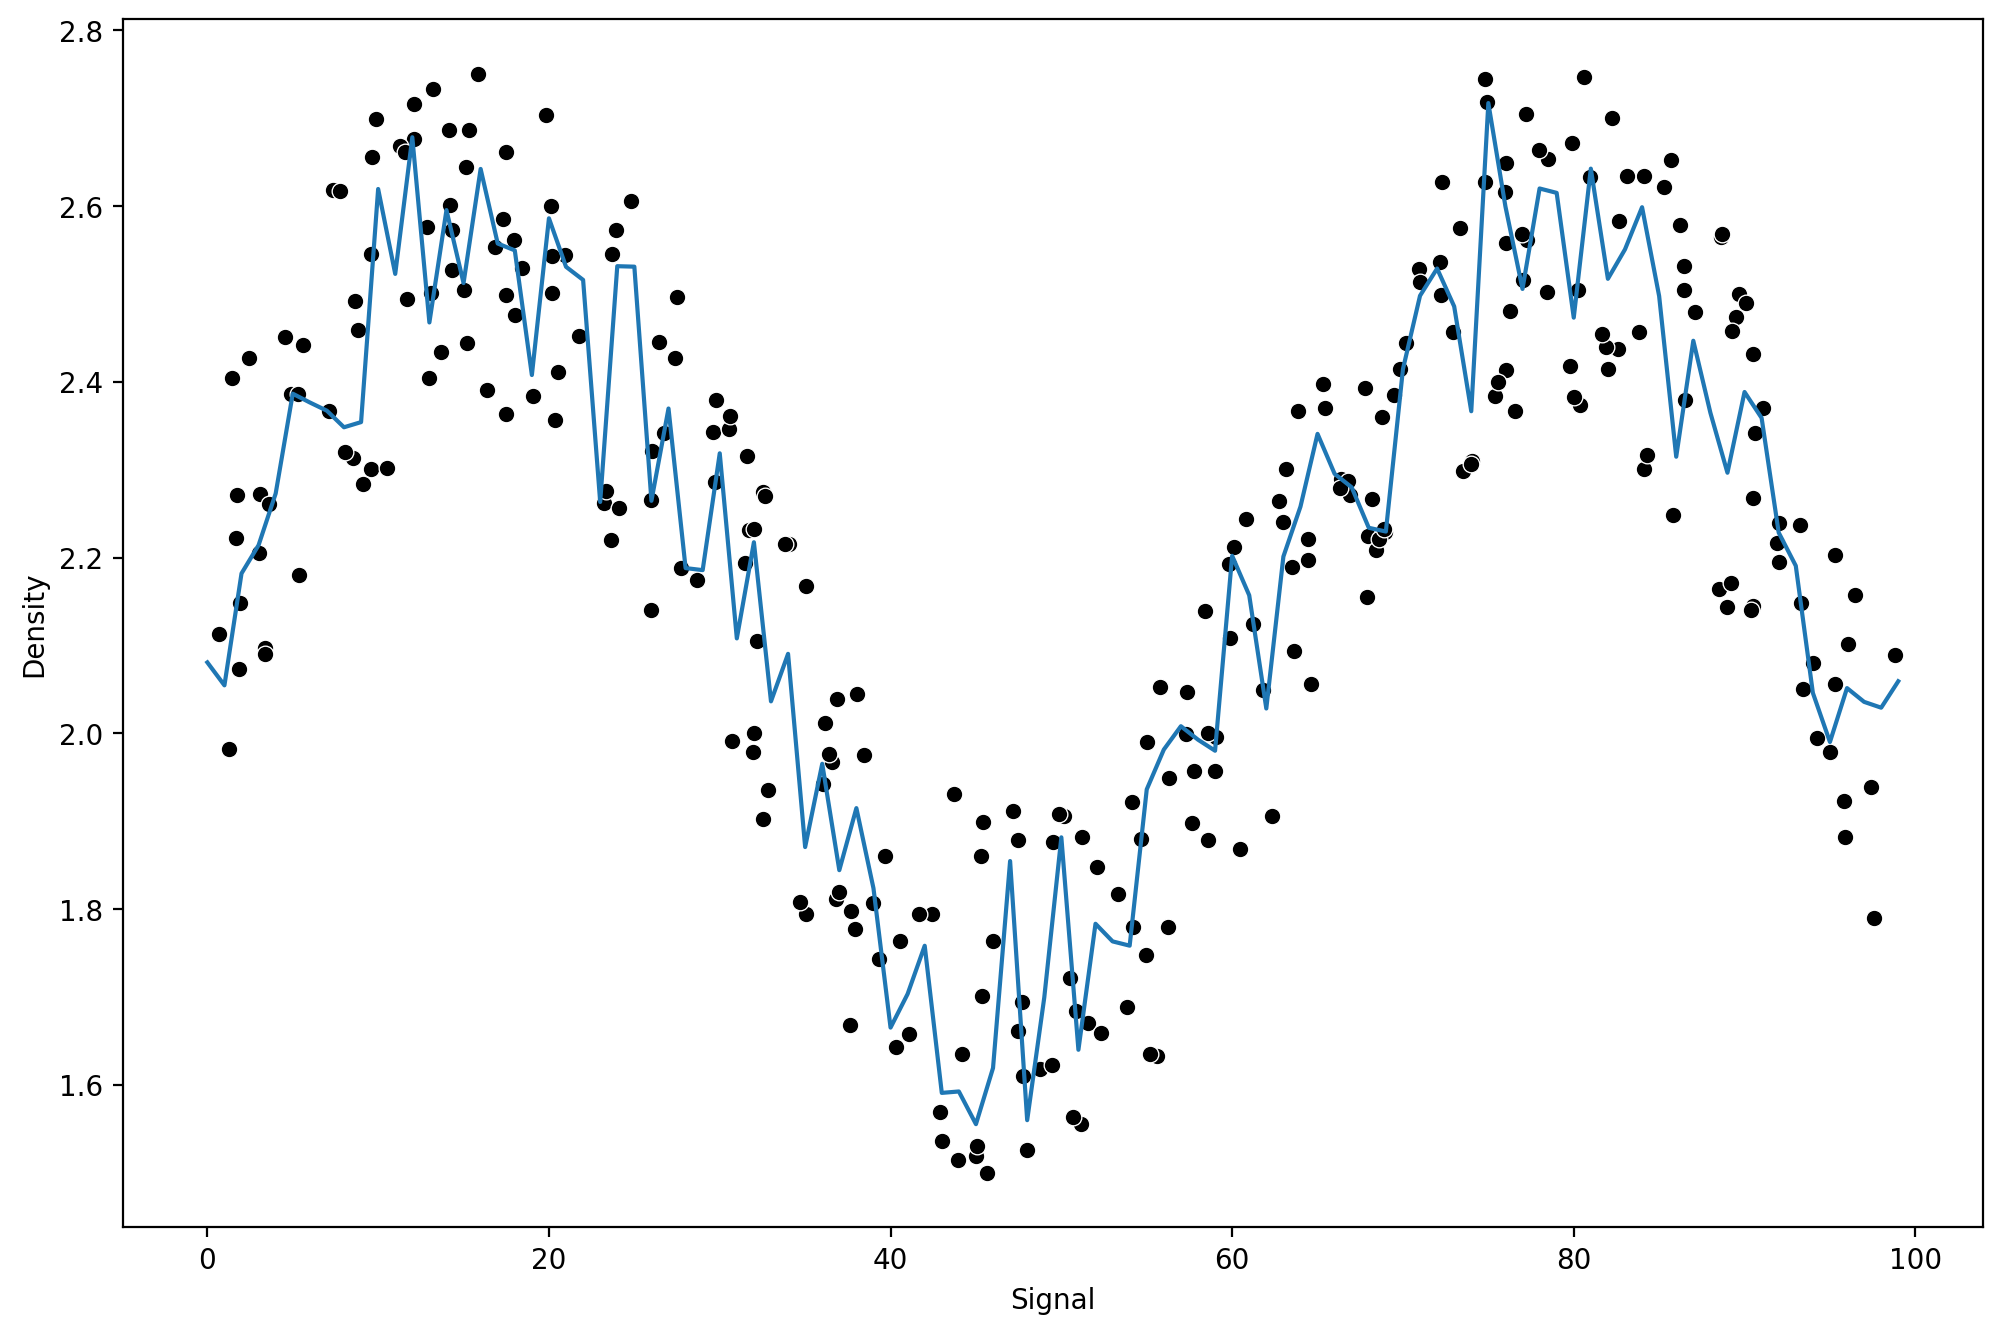

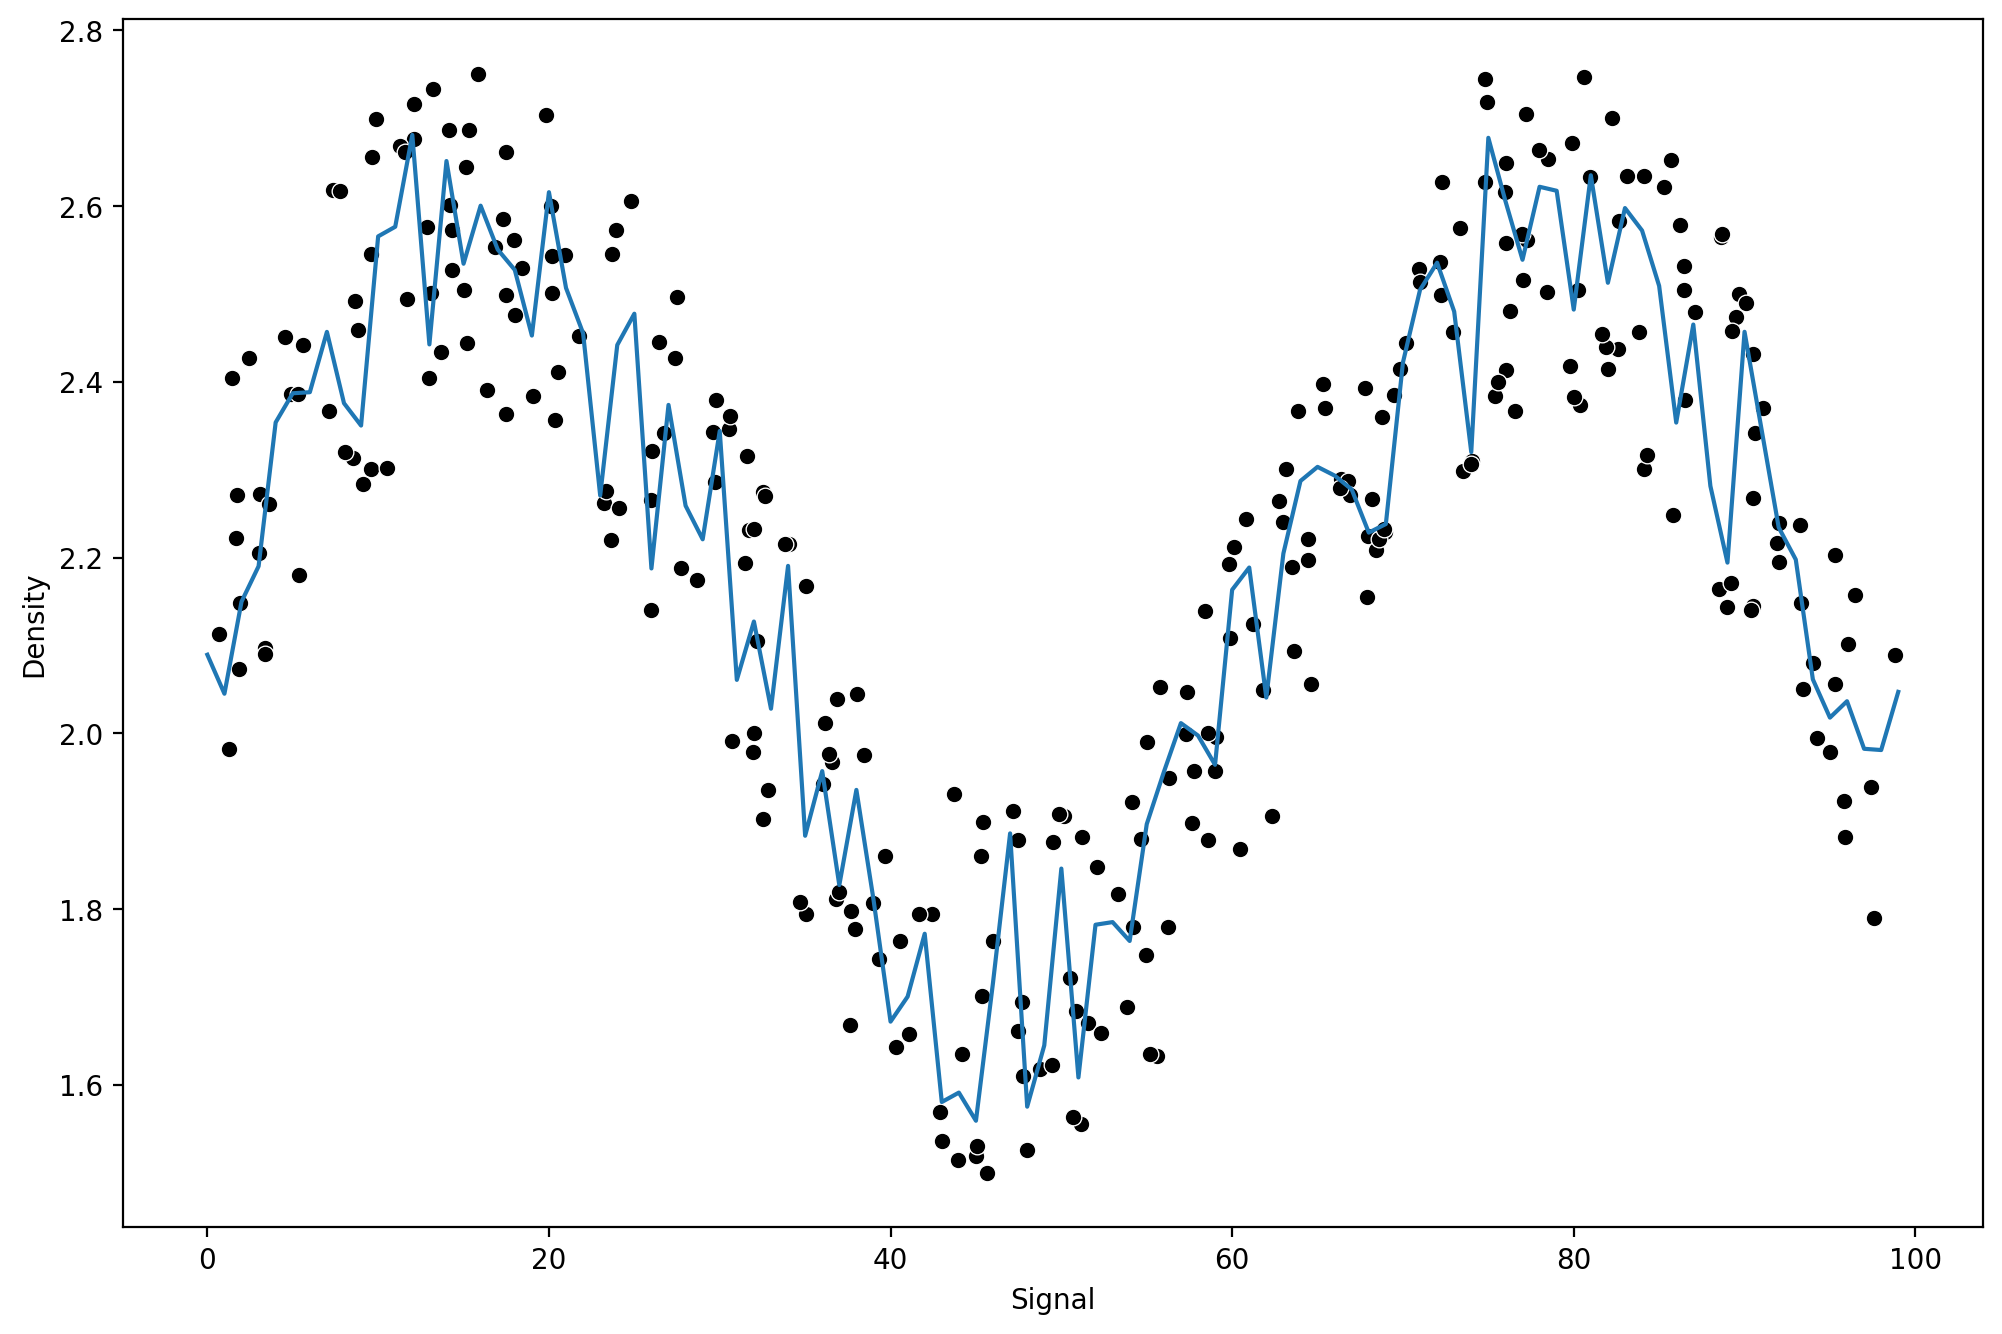

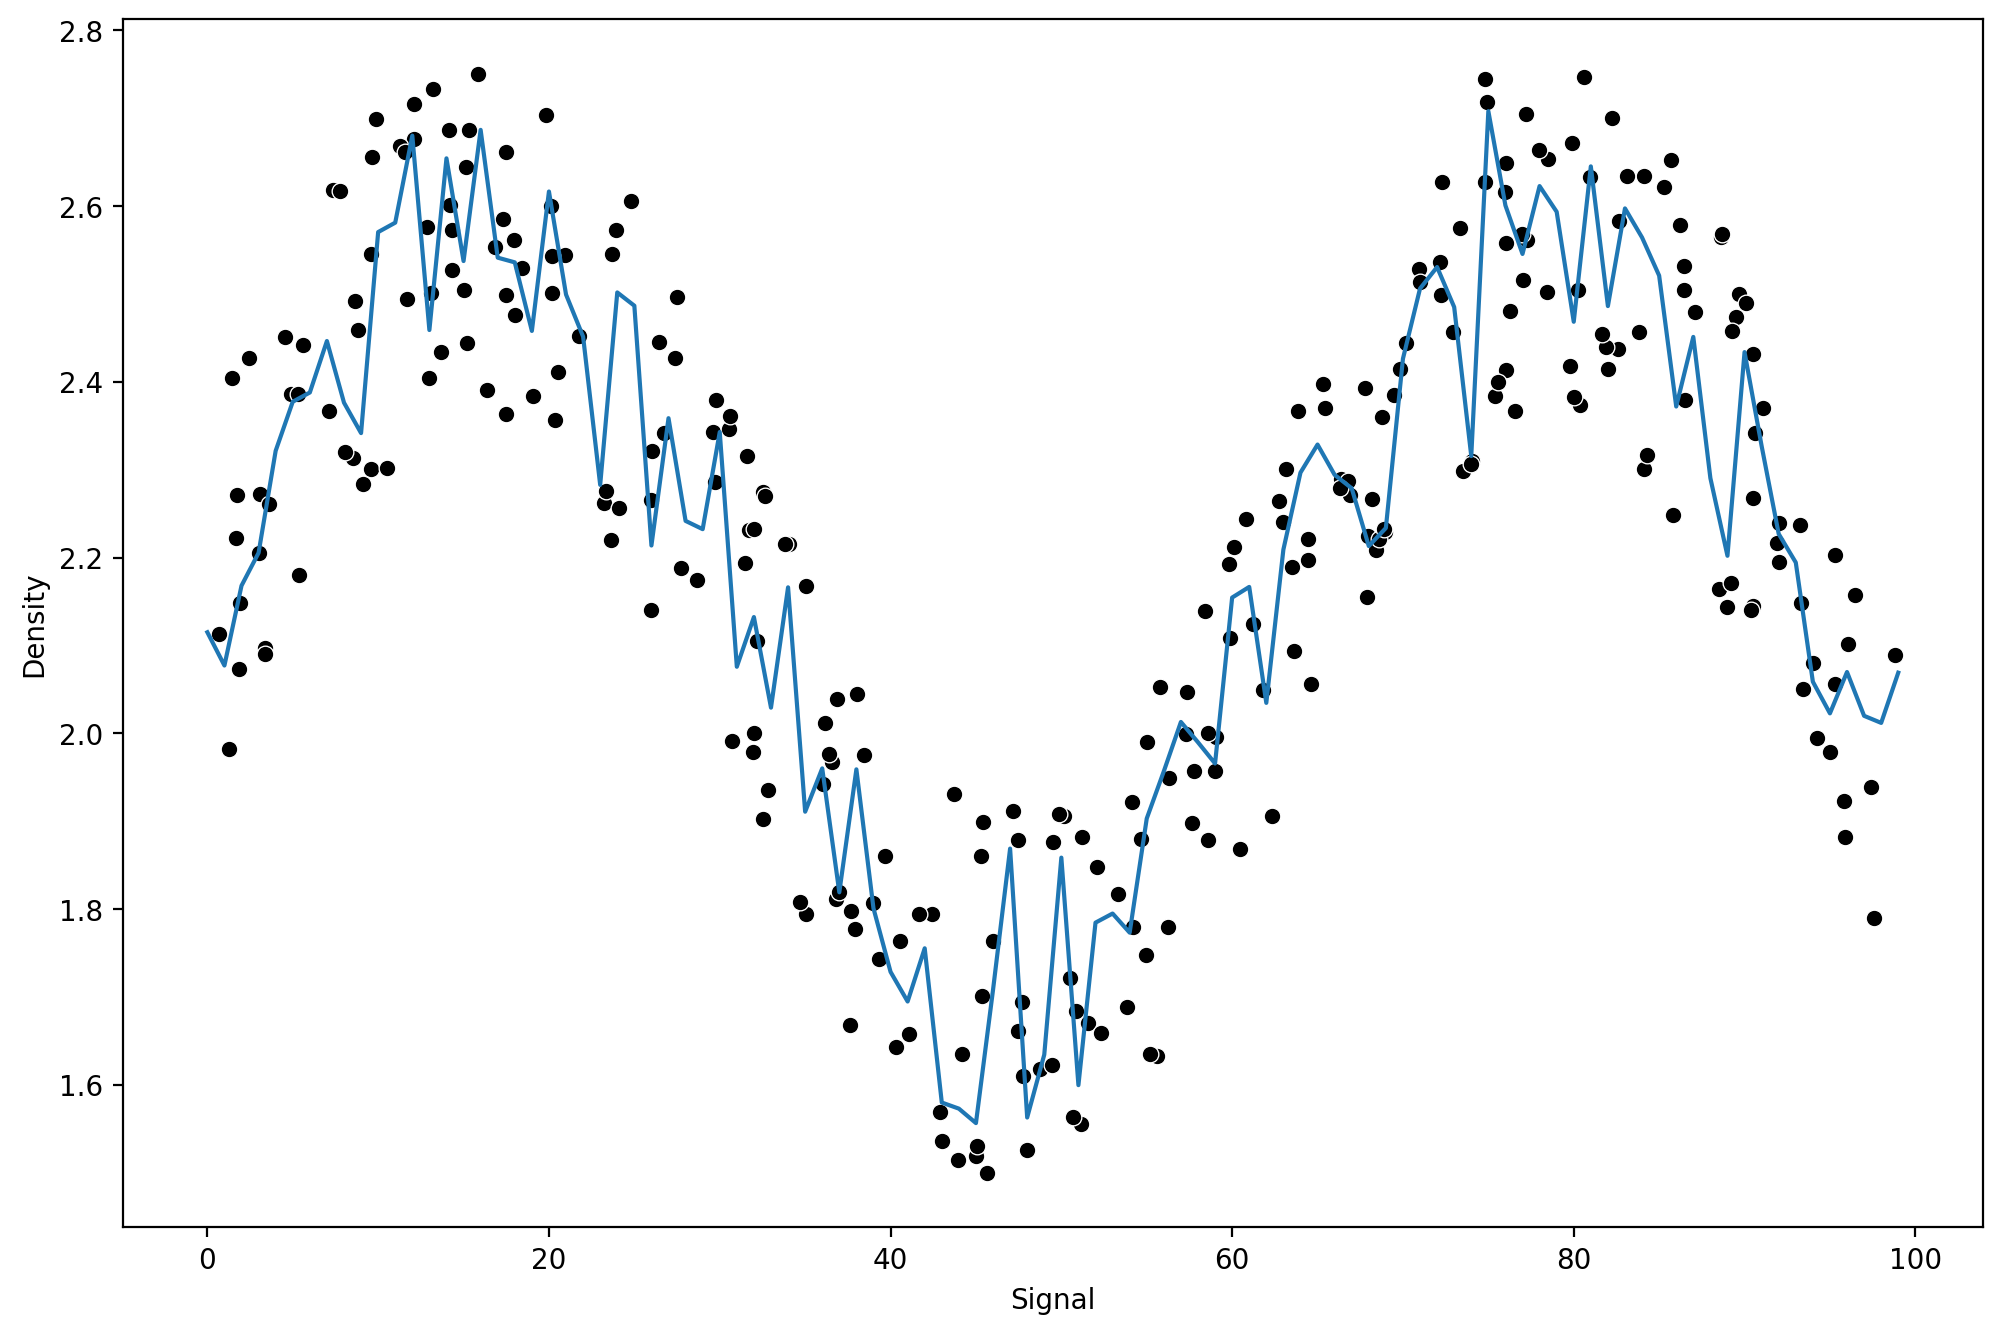

In [112]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

In [113]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

MAE:0.11318284854800689
RMSE:0.13294148649584667


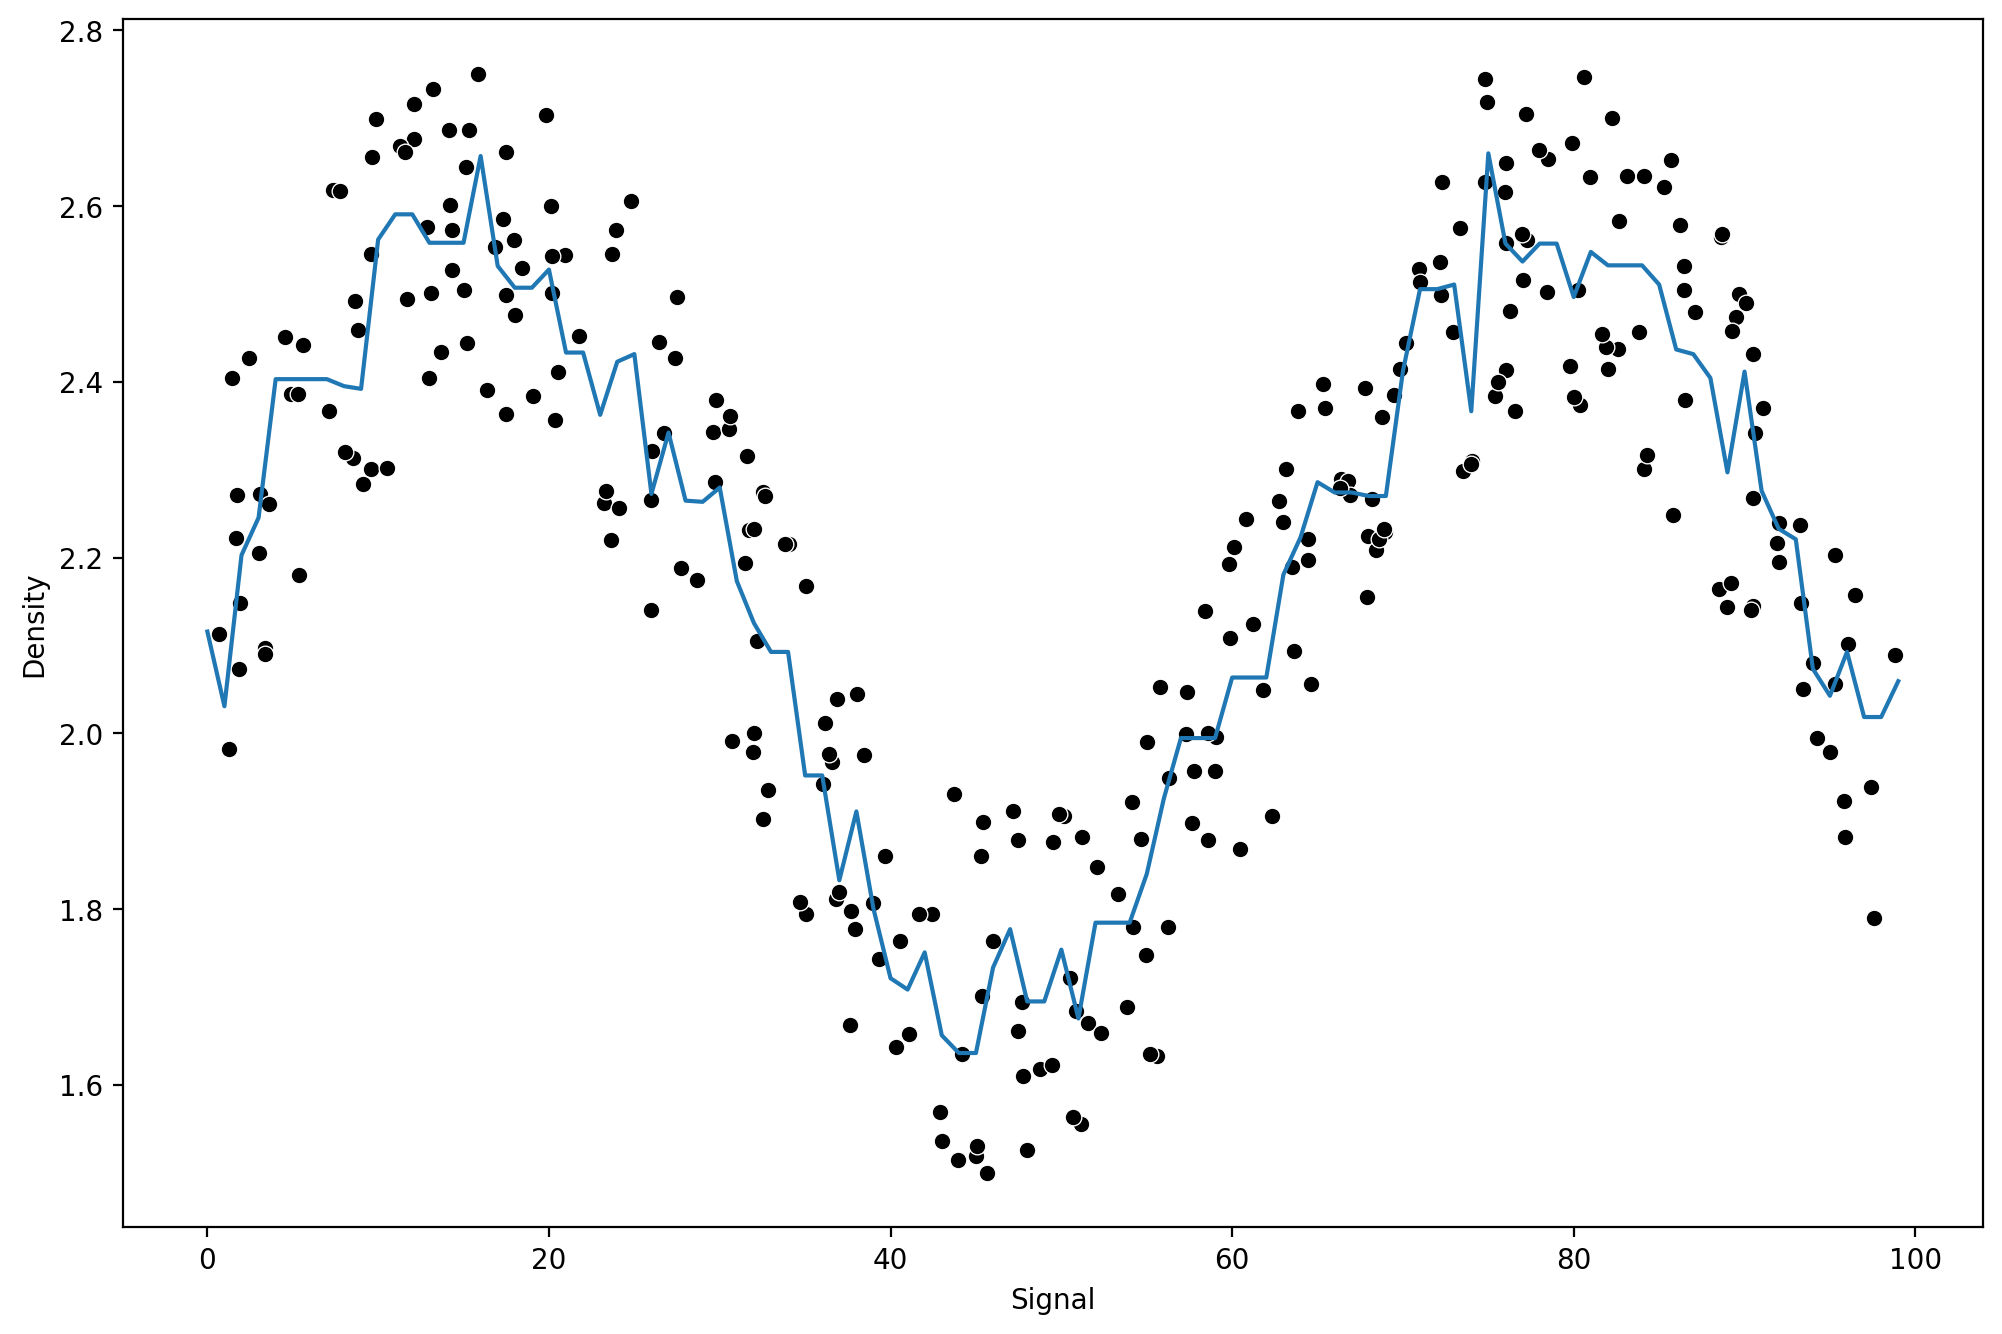

In [114]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)